# Part I - (Loan Data from Prosper)
## by (Adewale Yusuff Adeleke)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read csv
df_raw = pd.read_csv('prosperLoanData.csv')
df_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# to show the shape of dataframe
df_raw.shape

(113937, 81)

In [4]:
# the following columns are going to be used for the analysis
df = df_raw[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Recommendations', 'Investors']]
df.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,...,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,0,CO,...,2.0,True,640.0,659.0,"$25,000-49,999",True,3083.333333,9425,0,258
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,7.0,2,CO,...,44.0,False,680.0,699.0,"$50,000-74,999",True,6125.000000,10000,0,1
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,0,GA,...,NaN,False,480.0,499.0,Not displayed,True,2083.333333,3001,0,41
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,9.0,16,GA,...,113.0,True,800.0,819.0,"$25,000-49,999",True,2875.000000,10000,0,158
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,4.0,2,MN,...,44.0,True,680.0,699.0,"$100,000+",True,9583.333333,15000,0,20


In [5]:
# drop the null values in the following columns
df = df.dropna(subset=['EmploymentStatusDuration'])
df = df.dropna(subset=['ProsperScore'])
df = df.dropna(subset=['ClosedDate'])

In [6]:
# extract year from ListingCreationDate and ClosedDate
df["ListingCreationDate"] = df["ListingCreationDate"].str.extract(r"^(\w+)")
df["ClosedDate"] = df["ClosedDate"].str.extract(r"^(\w+)")
# convert ListingCreationDate, ClosedDate and StatedMonthlyIncome dtypes to integer
df['ClosedDate'] = pd.to_numeric(df['ClosedDate'],errors='coerce')
df['ListingCreationDate'] = pd.to_numeric(df['ListingCreationDate'],errors='coerce')
df['StatedMonthlyIncome'] = pd.to_numeric(df['StatedMonthlyIncome'],errors='coerce')
df.StatedMonthlyIncome = df.StatedMonthlyIncome.round().astype('Int64')

In [7]:
# to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25996 entries, 15 to 113935
Data columns (total 22 columns):
ListingKey                   25996 non-null object
ListingCreationDate          25996 non-null int64
Term                         25996 non-null int64
LoanStatus                   25996 non-null object
ClosedDate                   25996 non-null int64
BorrowerAPR                  25996 non-null float64
BorrowerRate                 25996 non-null float64
ProsperScore                 25996 non-null float64
ListingCategory (numeric)    25996 non-null int64
BorrowerState                25996 non-null object
Occupation                   25983 non-null object
EmploymentStatus             25996 non-null object
EmploymentStatusDuration     25996 non-null float64
IsBorrowerHomeowner          25996 non-null bool
CreditScoreRangeLower        25996 non-null float64
CreditScoreRangeUpper        25996 non-null float64
IncomeRange                  25996 non-null object
IncomeVerifiable      

In [8]:
# convert the following from float to integer
df.EmploymentStatusDuration = df.EmploymentStatusDuration.round().astype('Int64')
df.CreditScoreRangeLower = df.CreditScoreRangeLower.round().astype('Int64')
df.CreditScoreRangeUpper = df.CreditScoreRangeUpper.round().astype('Int64')
df.ProsperScore = df.ProsperScore.round().astype('Int64')

In [9]:
# to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25996 entries, 15 to 113935
Data columns (total 22 columns):
ListingKey                   25996 non-null object
ListingCreationDate          25996 non-null int64
Term                         25996 non-null int64
LoanStatus                   25996 non-null object
ClosedDate                   25996 non-null int64
BorrowerAPR                  25996 non-null float64
BorrowerRate                 25996 non-null float64
ProsperScore                 25996 non-null int64
ListingCategory (numeric)    25996 non-null int64
BorrowerState                25996 non-null object
Occupation                   25983 non-null object
EmploymentStatus             25996 non-null object
EmploymentStatusDuration     25996 non-null int64
IsBorrowerHomeowner          25996 non-null bool
CreditScoreRangeLower        25996 non-null int64
CreditScoreRangeUpper        25996 non-null int64
IncomeRange                  25996 non-null object
IncomeVerifiable             2

#### Storing Data

In [10]:
df.to_csv('prosperLoanData_clean.csv', index=False)

In [11]:
df.shape

(25996, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25996 entries, 15 to 113935
Data columns (total 22 columns):
ListingKey                   25996 non-null object
ListingCreationDate          25996 non-null int64
Term                         25996 non-null int64
LoanStatus                   25996 non-null object
ClosedDate                   25996 non-null int64
BorrowerAPR                  25996 non-null float64
BorrowerRate                 25996 non-null float64
ProsperScore                 25996 non-null int64
ListingCategory (numeric)    25996 non-null int64
BorrowerState                25996 non-null object
Occupation                   25983 non-null object
EmploymentStatus             25996 non-null object
EmploymentStatusDuration     25996 non-null int64
IsBorrowerHomeowner          25996 non-null bool
CreditScoreRangeLower        25996 non-null int64
CreditScoreRangeUpper        25996 non-null int64
IncomeRange                  25996 non-null object
IncomeVerifiable             2

### What is the structure of your dataset?

> There are 25,996 borrowers in the dataset with 22 variables ('ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Recommendations', 'Investors'). Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the repayment of loan (Loanstatus) in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect almost all the choosing variable to have effects on the investigation into my feature of interest, but the degree of the effect might differ. The major (dependent) variable to focus on is 'Loanstatus'.

## Univariate Exploration




__1. Why was this loan taken?__

In [13]:
def myCountPlot(df,xVar,hueVar=None,color=sb.color_palette()[0],palette=None,order=None):
    # set plot dimensions
    plt.figure(figsize=[14, 6])
    # plot
    sb.countplot(data=df, x = xVar,hue=hueVar,color=color,palette=palette,order=order,edgecolor='black');
    plt.title(f'''Distribution of {xVar} {'by' if hueVar else ''} {hueVar if hueVar else ''}'''.title(), fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

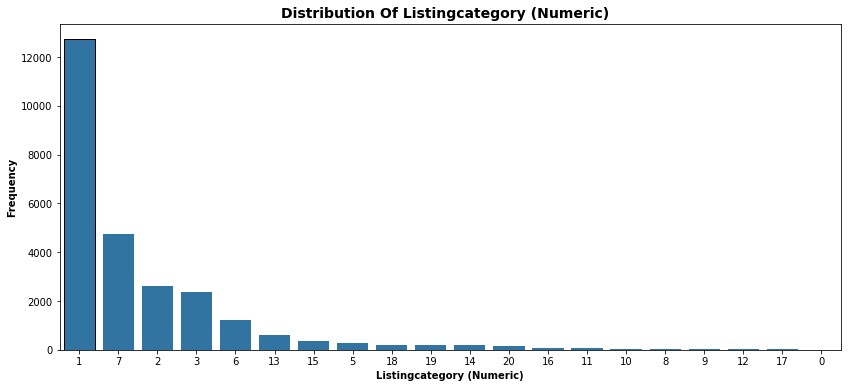

In [14]:
# call plot function
myorder = df['ListingCategory (numeric)'].value_counts().index
myCountPlot(df,'ListingCategory (numeric)', order = myorder)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

#### Conclusion

According to the chart above, the major reason why people are collecting loan is Debt Consolidation.

__2. How long (in months) are the periods on the loans?__

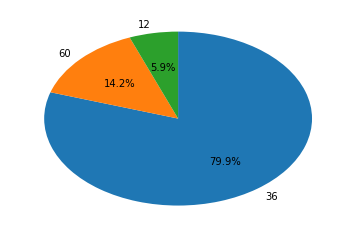

In [15]:
sorted_counts = df['Term'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

#### Conclusion

According to the pie chart above, almost 80% of the loan are for 36 months, while 14% of tis 60 months and almost 6% of the time is just for 12 months

__3. What is the loan status at the end of this data collection?__

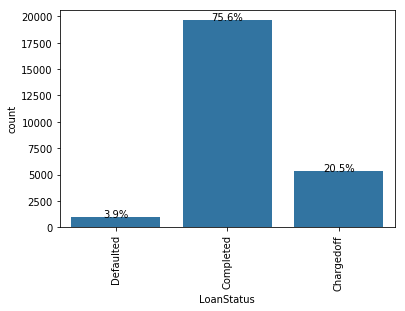

In [16]:
# Returns the sum of all not-null values in `LoanStatus` column
n_df = df['LoanStatus'].value_counts().sum()
LoanStatus_counts = df['LoanStatus'].value_counts()
# Return the highest frequency in the `LoanStatus` column
max_LoanStatus_count = LoanStatus_counts[0]
mycol = sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanStatus', color = mycol)
# Recalculating the type_counts just to have clarity.
LoanStatus_counts = df['LoanStatus'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90) 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = LoanStatus_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');


#### Conclusion

The Bar chart above shows that 75.6% of the loans are completed, 3.9% are defaulted, while 20.5% of the loan are charged-off.

__4. What is the highest number of BorrowerRate?__

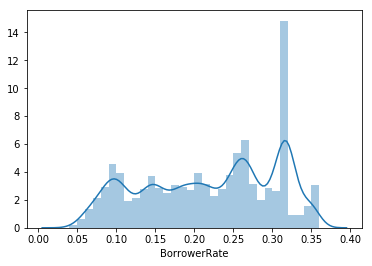

In [17]:
sb.distplot(df['BorrowerRate']);

#### Conclusion

The borrowerrate distribution ranges from 0 - 0.4.

__5. Does the BorrowerRate distribution corresponds with the Borrower's Annual Percentage Rate (APR) for the loan?__

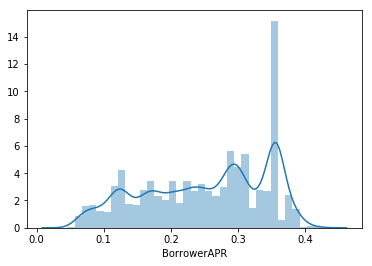

In [18]:
sb.distplot(df['BorrowerAPR']);

#### Conclusion

Yes, Borrowerrate distribution corresponds with the Borrower's Annual Percentage Rate (APR) for the loan.

__6. According to the Prosper's historical data, how risky are the loans?__

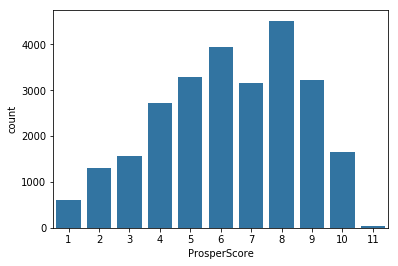

In [19]:
mycol = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperScore', color = mycol);

#### Conclusion

According to the ProsperScore chart above, majority of the loans fall under normal or moderate risk category.

__7. What state are most borrowers from?__

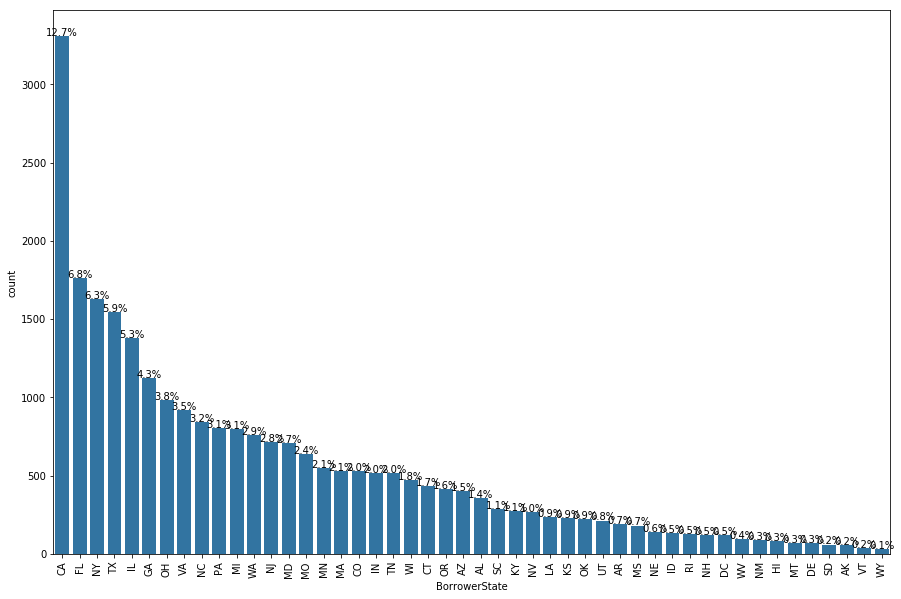

In [20]:
# Returns the sum of all not-null values in `BorrowerState` column
n_df = df['BorrowerState'].value_counts().sum()
BorrowerState_counts = df['BorrowerState'].value_counts()
# Return the highest frequency in the `BorrowerState` column
max_BorrowerState_count = BorrowerState_counts[0]
mycol = sb.color_palette()[0]
fig, ax = plt.subplots(figsize=(15,10))
myorder = df['BorrowerState'].value_counts().index
sb.countplot(data = df, x = 'BorrowerState', color = mycol, order = myorder)
# Recalculating the BorrowerState_counts just to have clarity.
type_counts = df['BorrowerState'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90) 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');

#### Conclusion

Bar chart above shows that borrowers states are distribute among 20 states. CA is on the top, followed by FL and then NY.

__8. Are the borrowers employed?__

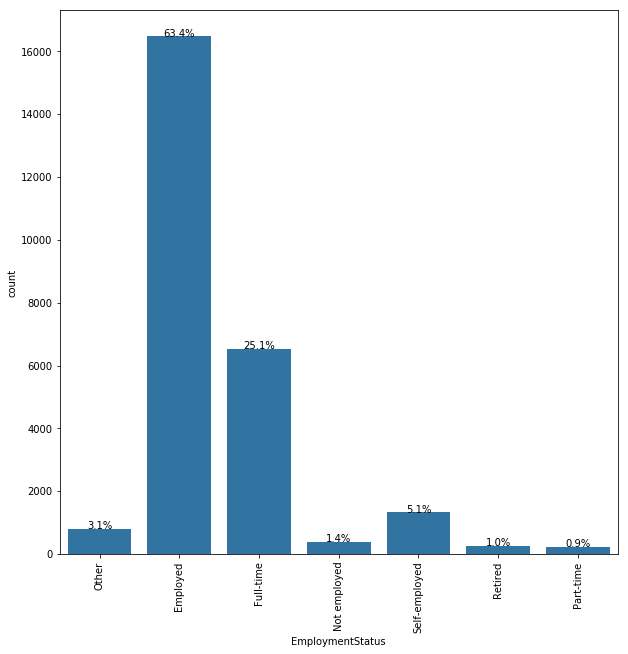

In [21]:
# set color and figsize
mycol = sb.color_palette()[0]
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(data = df, x = 'EmploymentStatus', color = mycol)
# Recalculating the EmploymentStatus_counts just to have clarity.
EmploymentStatus_counts = df['EmploymentStatus'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90) 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = EmploymentStatus_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');

#### Conclusion

The Bar chart above shows that more than 80% of the borrowers are employed.

__9. Do borrowers owns home?__

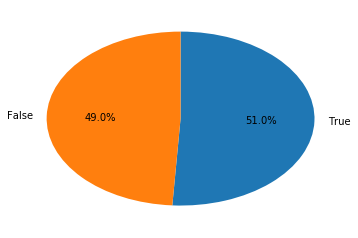

In [22]:
sorted_counts = df['IsBorrowerHomeowner'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

#### Conclusion

From the pie chart above, 51% of the borrowers are home owners.

__10. What is the lower credit score range of the borrowers?__

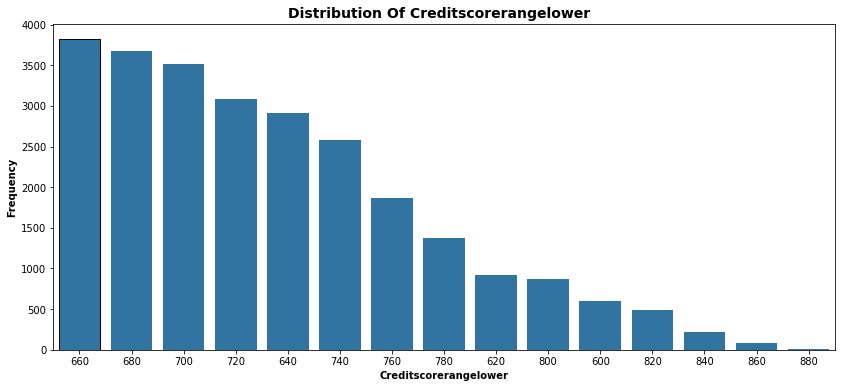

In [23]:
# call plot function
myorder = df['CreditScoreRangeLower'].value_counts().index
myCountPlot(df,'CreditScoreRangeLower', order = myorder)

#### Conclusion

Majority of the borrowers scored above 740 in CreditScoreRangeLower according to the chart above.

__11. What income range do the borrowers belong to?__

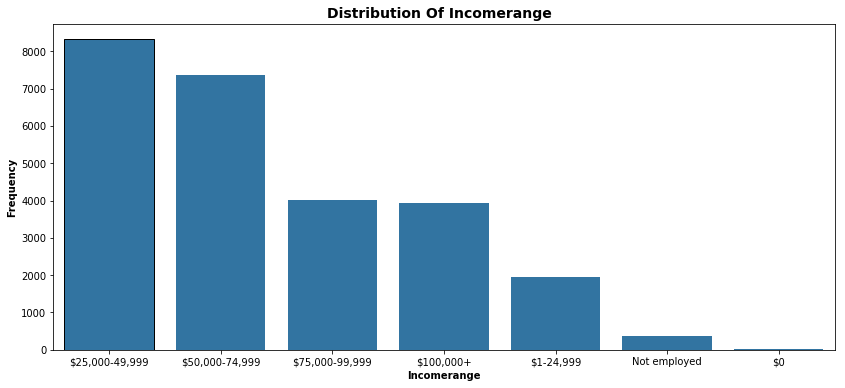

In [24]:
# call plot function
myorder = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
myorder = df['IncomeRange'].value_counts().index
myCountPlot(df,'IncomeRange', order = myorder)

#### Conclusion

The bar chart above shows that majority of the borrowers earns $50,000 and above.

__12. What proportion of the borrowers have a verifiable source of income?__

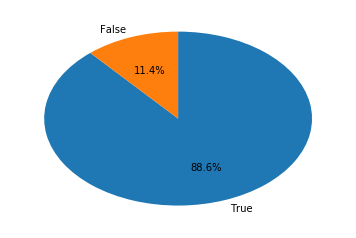

In [25]:
sorted_counts = df['IncomeVerifiable'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

#### Conclusion

From the pie chart above, we could deduce that more than 88% of the borrowers have a verified source of income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of my choosen variables are reasonably distributed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Data tidiness are done, as there are few variables with unmatched dtypes, and Year was extracted from 'ListingCreationDate' and 'ClosedDate'so as to be able to effectively run numetrical functions. Some rows where dropped as a result of incomplete data and null values.

## Bivariate Exploration


#### 13. Is there any correlation between the amount borrowed and the rate of interest?

Text(0,0.5,'Amount borrowed')

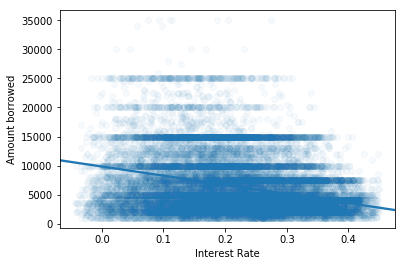

In [26]:
# plot
sb.regplot(data = df, x = 'BorrowerRate', y = 'LoanOriginalAmount', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/30});
plt.xlabel('Interest Rate')
plt.ylabel('Amount borrowed')

#### Conclusions

The plot above shows tha there is a partial negative correlation between the amont borrowed and the interest rate charged for the analysed data. As the amount borrowed is increasing,the interest rate tends to go down.

BorrowerRate  vs  LoanOriginalAmount

#### Conclusion

#### 14. How does stated monthly income affects loan payments?

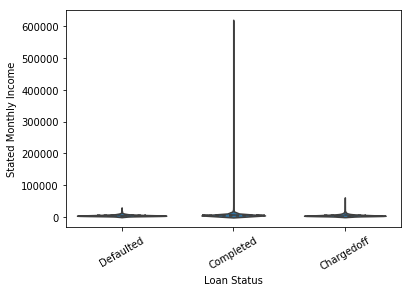

In [27]:
# plot Violin plot
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='LoanStatus', y='StatedMonthlyIncome', color=base_color, inner='quartile')
plt.xticks(rotation=30);
plt.xlabel('Loan Status')
plt.ylabel('Stated Monthly Income');

#### Conclusion

The violing plots above show that people that are 'Defaulted' and 'Chargedoff' earns less than 10,000 dollars  monthly. 
        Thus the majority of those who were unable to pay up their loans are low income earners, while people that earn more than 10,000 dollars monthly always complete their payment on time. 

#### 15. Does interest rate has effect on the loan payment?

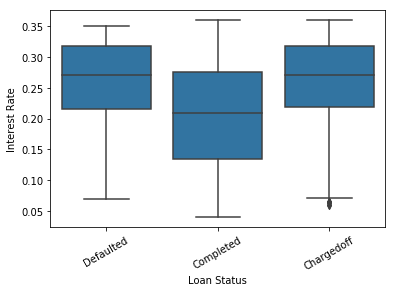

In [28]:
# plot Box plot
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='LoanStatus', y='BorrowerRate', color=base_color)
plt.xticks(rotation=30);
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate');

#### Conclusion

It is depicted on the above box plot that the majority of the Completed (Loan Status) plot has a relatively lower interest rate compared to 'Default' and 'Chargeoff'. This shows that majority of the borrowers tends to pay up on time when the interest rate is minimal. 

#### 16. Does Employment status affects Loan payment?

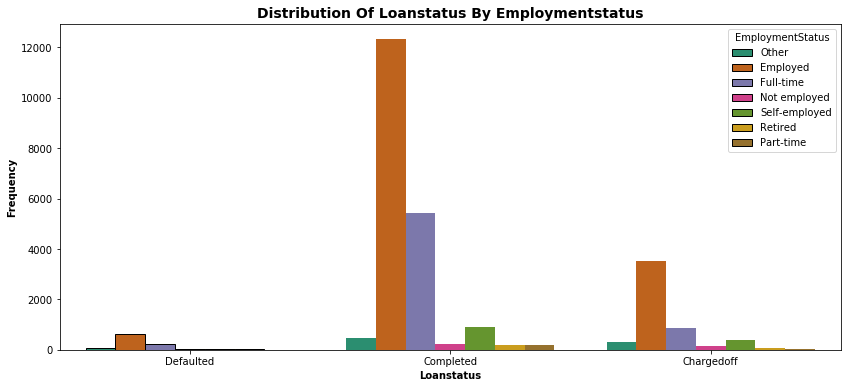

In [29]:
# call plot function
myCountPlot(df,'LoanStatus', hueVar = 'EmploymentStatus', palette = 'Dark2' )

#### Conclusion

The chart above shows that majority of the employed borrowers pay up and  their loans. This confirms that employement status actually has influence on loan payment.

#### 17. Is source of income verification a factor for loan payment?

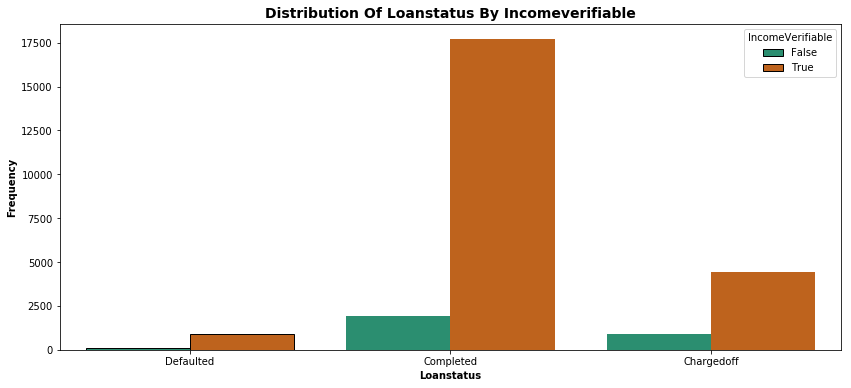

In [30]:
# call plot function
myCountPlot(df,'LoanStatus', hueVar = 'IncomeVerifiable', palette = 'Dark2' )

#### Conclusion

The chart above depicts that the Completed loan status count for the borrowers with verifiable income source is relatively higher compared to the rest of the chart.
This affirms that verification of source of income is essential for loan payments.

#### 18. Does house ownership affects loan payments?

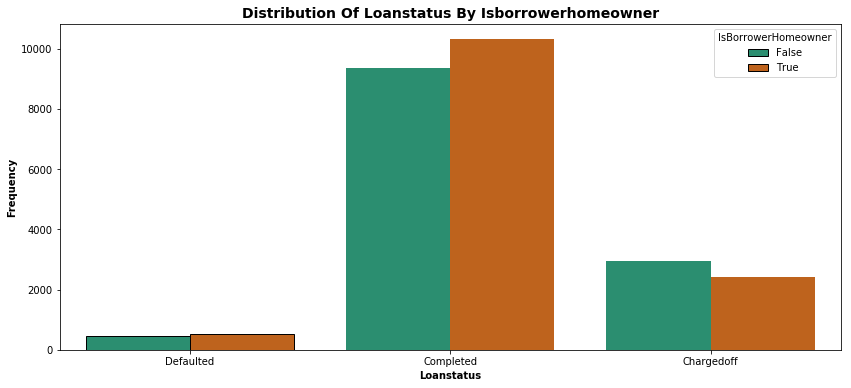

In [31]:
# call plot function
myCountPlot(df,'LoanStatus', hueVar = 'IsBorrowerHomeowner', palette = 'Dark2' )

#### Conclusion

The chart above shows that a relatively higher amount of house owners completed their loan repayment compared to those that are not home owners.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the analysis above, i ncrease in StatedMonthlyIncome and decrease in BorrowerRate tends to have positive effects on  LoanStatus. Also people that are employed and more importantly when their employment status is verifiable tends to complete their loan payments compared to the unemployed or retired conterparts.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that there is a partial negative correlation between the LoanOriginalAmount and the BorrowerRate. As the amount borrowed is increasing, the interest rate tends to go down.

## Multivariate Exploration


#### 19.Cummulative effect of interest rate and owning a house on the loan payment

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


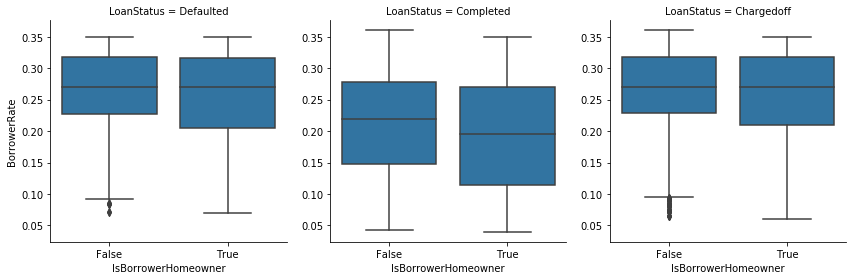

In [32]:
# plot box plot
g = sb.FacetGrid(data = df, col = 'LoanStatus', size = 4)
g.map(sb.boxplot, 'IsBorrowerHomeowner', 'BorrowerRate')

#### Conclusion

As it was deduced from my bivariate explorations above that high interest rate and not owning a house have adverse effects on loan payments, the above multivariate explorattion further affirmed the assertions.
The chart in the middle (Completed) shows that borrowers tends to complete their payment more when they own house, as compared to when they do not, and the interest rate is relatively low compared to the two other charts. 

#### 20. Effects of Recommendations and Loan amonts on Loan payment.

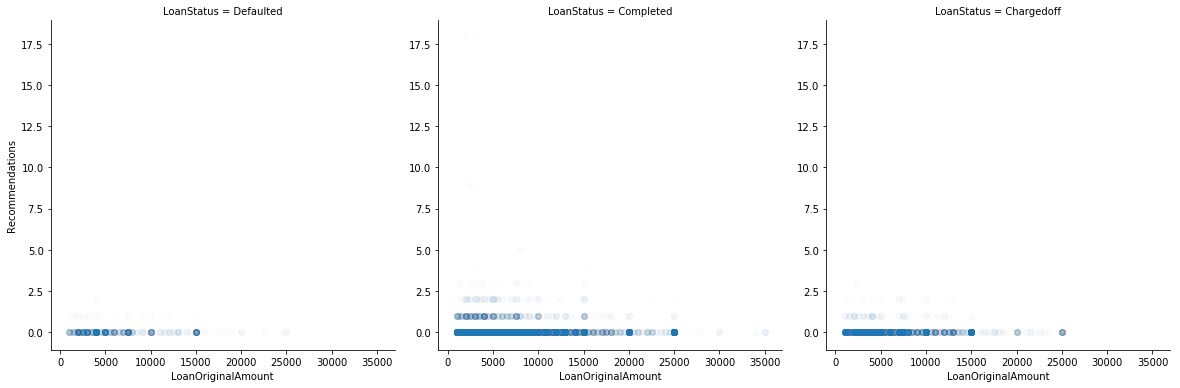

In [33]:
g = sb.FacetGrid(data = df, col = 'LoanStatus', size = 5.5, margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'Recommendations', alpha=1/90);

#### Conclusions

The Facet grid plot above show that even when the loan amont is high, borrowers tends to complete their loan payments when they have better reccommendations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As it was deduced from my bivariate explorations above that high interest rate and not owning a house have adverse effects on loan payments, the above multivariate explorattion further affirmed the assertions. The chart in the middle (Completed) shows that borrowers tends to complete their payment more when they own house, as compared to when they do not, and the interest rate is relatively low compared to the two other charts.

### Were there any interesting or surprising interactions between features?

>  Surprisingly, even when the loan amont is high, borrowers tends to complete their loan payments, especially when they have better reccommendations.

## Conclusions
>        On the course of this project, few data tidiness are done, as there are few variables with unmatched dtypes, and Year was extracted from 'ListingCreationDate' and 'ClosedDate'so as to be able to effectively run numetrical functions. Some rows where dropped as a result of incomplete data and null values.
         My major area of interest is on repayment of loan (Loanstatus), so as to know what factors contributed to effective loan repayment.
         The analysis shows that increase in StatedMonthlyIncome and decrease in BorrowerRate tends to have positive effects on  LoanStatus. Also people that are employed and more importantly when their employment status is verifiable tends to complete their loan payments compared to the unemployed or retired conterparts.
          As it was deduced from my bivariate explorations above that high interest rate and not owning a house have adverse effects on loan payments, the above multivariate explorattion further affirmed the assertions. The chart in the middle (Completed) shows that borrowers tends to complete their payment more when they own house, as compared to when they do not, and the interest rate is relatively low compared to the two other charts.
             Even when the loan amont is high, borrowers tends to complete their loan payments, especially when they have better reccommendations.
             I observed that there is a partial negative correlation between the LoanOriginalAmount and the BorrowerRate. As the amount borrowed is increasing, the interest rate tends to go down.

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0